In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import string
import os
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle 

In [2]:
# Read Files
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

# add labels true and fake to dataset
fake['label'] = 'fake'
true['label'] = 'true'

In [3]:
# combine fake and true data
data = pd.concat([fake, true])

# shuffle data
data = shuffle(data)
data

,title,text,subject,date,label
5101,Sudan disappointed at renewal of U.S. travel b...,KHARTOUM (Reuters) - Sudan’s foreign ministry ...,politicsNews,"March 7, 2017",true
11762,VOTE THEM OUT! SIX SENATE DEMOCRATS Up For Ree...,Florida Bill Nelson (D) Indiana Joe Donnelly (...,politics,"Feb 1, 2017",fake
20425,SHOCKER! WAS MUSLIM TERRORIST GAY? Used Gay Da...,"Of course, Mateen s Muslim father vehemently d...",left-news,"Jun 13, 2016",fake
5303,U.S. education secretary calls Obama transgend...,WASHINGTON (Reuters) - U.S. Education Secretar...,politicsNews,"February 23, 2017",true
10462,PRESIDENT TRUMP AND MELANIA Arrive in Poland t...,The President and First Lady touched down in W...,politics,"Jul 5, 2017",fake
...,...,...,...,...,...
3291,Trump announces push to speed up 'desperately-...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"June 9, 2017",true
15426,BREAKING: IT TURNS OUT BOWE AND B.O. HAVE SOME...,"Besides being a muslim terrorist sympathizer, ...",politics,"Jul 24, 2015",fake
2808,"Trump calls son 'high-quality person,' applaud...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"July 11, 2017",true
10214,STATUE OF LIBERTY AS A MUSLIM? Congressman Spa...,Here we go again another student art contest t...,politics,"Aug 6, 2017",fake


In [4]:
# remove date, title and subject from data
data.drop(["date"],axis=1,inplace=True)
data.drop(["title"],axis=1,inplace=True)
data.drop(["subject"],axis=1,inplace=True)
data

,text,label
5101,KHARTOUM (Reuters) - Sudan’s foreign ministry ...,true
11762,Florida Bill Nelson (D) Indiana Joe Donnelly (...,fake
20425,"Of course, Mateen s Muslim father vehemently d...",fake
5303,WASHINGTON (Reuters) - U.S. Education Secretar...,true
10462,The President and First Lady touched down in W...,fake
...,...,...
3291,WASHINGTON (Reuters) - President Donald Trump ...,true
15426,"Besides being a muslim terrorist sympathizer, ...",fake
2808,WASHINGTON (Reuters) - President Donald Trump ...,true
10214,Here we go again another student art contest t...,fake


In [5]:
# lower all cases to lower
data['text'] = data['text'].apply(lambda x: x.lower())
data

,text,label
5101,khartoum (reuters) - sudan’s foreign ministry ...,true
11762,florida bill nelson (d) indiana joe donnelly (...,fake
20425,"of course, mateen s muslim father vehemently d...",fake
5303,washington (reuters) - u.s. education secretar...,true
10462,the president and first lady touched down in w...,fake
...,...,...
3291,washington (reuters) - president donald trump ...,true
15426,"besides being a muslim terrorist sympathizer, ...",fake
2808,washington (reuters) - president donald trump ...,true
10214,here we go again another student art contest t...,fake


In [6]:
# break string to chars and scan for punctuation from punctuation database
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

# remove punctuations
data['text'] = data['text'].apply(punctuation_removal)
data

,text,label
5101,khartoum reuters sudan’s foreign ministry sai...,true
11762,florida bill nelson d indiana joe donnelly d m...,fake
20425,of course mateen s muslim father vehemently de...,fake
5303,washington reuters us education secretary bet...,true
10462,the president and first lady touched down in w...,fake
...,...,...
3291,washington reuters president donald trump on ...,true
15426,besides being a muslim terrorist sympathizer i...,fake
2808,washington reuters president donald trump cal...,true
10214,here we go again another student art contest t...,fake


In [7]:
# use ntlk database to remove stopwords from the text
stop = nltk.corpus.stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data

,text,label
5101,khartoum reuters sudan’s foreign ministry said...,true
11762,florida bill nelson indiana joe donnelly michi...,fake
20425,course mateen muslim father vehemently denies ...,fake
5303,washington reuters us education secretary bets...,true
10462,president first lady touched warsaw poland tod...,fake
...,...,...
3291,washington reuters president donald trump frid...,true
15426,besides muslim terrorist sympathizer appears b...,fake
2808,washington reuters president donald trump call...,true
10214,go another student art contest brings controve...,fake


In [8]:
# train/test splitting
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=7)

# Use Decision Tree Classifier
pipe = Pipeline([('cv', CountVectorizer()), #Text to tokens
                 ('tf', TfidfTransformer()), # tokens to tf-idf representation
                 ('model', DecisionTreeClassifier(criterion='entropy', max_depth=30))]) # finally decision tree

print("Preprocessing Done!")
print("Fitting Data")

# Fitting the model
model = pipe.fit(X_train, y_train)
print("Fitting Data Done!")

# Accuracy
prediction = model.predict(X_test)
print("DecisionTree accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

Preprocessing Done!
Fitting Data
Fitting Data Done!
DecisionTree accuracy: 99.73%


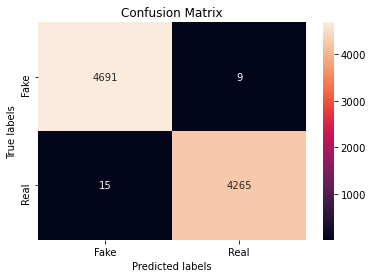

In [9]:
# Display confusion matrix 
cm = metrics.confusion_matrix(y_test, prediction)
labels = ['Fake', 'Real']
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.show()